In [2]:
from typing_extensions import TypedDict
from typing import Literal

class TypeDictState(TypedDict):
    name:str
    game: Literal["football","tennis"]



In [28]:
import random

def play_game(state:TypeDictState):
    print("... Play Game node has been called")
    return{"name":state["name"]+ "want to play"}

def football(state:TypeDictState):
    print("... footbal node has been called")
    return{"name":state["name"],"game":"football"}

def tennis(state:TypeDictState):
    print("... tennis node has been called")
    return{"name":state["name"], "game":"tennis"}

def decide_game(state:TypeDictState)->Literal["football","tennis"]:
    
    if random.random()>0.5:
        return 'football'
    else:
        return 'tennis'

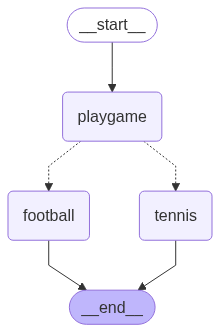

In [30]:
from IPython.display import Image, display
from langgraph.graph import StateGraph,START,END

builder = StateGraph(TypeDictState)
builder.add_node("playgame", play_game)
builder.add_node("football", football)
builder.add_node("tennis", tennis)

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_game)
builder.add_edge("football",END)
builder.add_edge("tennis",END)

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [33]:
graph.invoke({"name":"Etienne"})

... Play Game node has been called
... tennis node has been called


{'name': 'Etiennewant to play', 'game': 'tennis'}

In [46]:
### DataClasses

from dataclasses import dataclass

@dataclass
class DataClassState():
    name:str
    game: Literal["football","tennis"]


In [47]:

import random

def play_game(state:DataClassState):
    print("... Play Game node has been called")
    return{"name":state.name+ "want to play"}

def football(state:DataClassState):
    print("... footbal node has been called")
    return{"name":state.name,"game":"football"}

def tennis(state:DataClassState):
    print("... tennis node has been called")
    return{"name":state.name, "game":"tennis"}

def decide_game(state:DataClassState)->Literal["football","tennis"]:
    
    if random.random()>0.5:
        return 'football'
    else:
        return 'tennis'

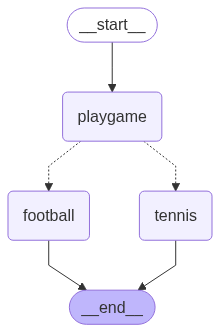

In [48]:
from IPython.display import Image, display
from langgraph.graph import StateGraph,START,END

builder = StateGraph(DataClassState)
builder.add_node("playgame", play_game)
builder.add_node("football", football)
builder.add_node("tennis", tennis)

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_game)
builder.add_edge("football",END)
builder.add_edge("tennis",END)

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [49]:
graph.invoke(DataClassState(name = "Etienne", game="football"))

... Play Game node has been called
... footbal node has been called


{'name': 'Etiennewant to play', 'game': 'football'}